In [6]:
from sklearn.svm import SVC

import numpy as np

import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn import preprocessing

In [3]:
data=pd.read_excel('processed_data_final.xlsx')

In [4]:
data

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,Age_Senior-level,YearsAtCompany_Apprentice,YearsAtCompany_Expert,YearsAtCompany_Journeyman,YearsAtCompany_Master,Avg Time Spent(Mins)_0,Avg Time Spent(Mins)_1,Avg Time Spent(Mins)_2,Avg Time Spent(Mins)_3,Avg Time Spent(Mins)_4
0,0,2,2,-0.39,2,1,1,0,1,0,...,True,False,False,False,True,False,False,False,True,False
1,1,1,1,0.10,1,1,2,0,1,6,...,False,True,False,False,False,False,True,False,False,False
2,0,1,1,0.96,4,4,3,1,4,7,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,-0.89,5,1,4,1,3,1,...,False,False,False,True,False,False,False,False,True,False
4,0,2,1,0.10,1,3,5,1,1,7,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,0,2,2,-0.64,3,4,4405,0,2,1,...,False,False,False,True,False,True,False,False,False,False
4296,0,2,1,-0.52,4,3,4406,0,1,6,...,False,True,False,False,False,True,False,False,False,False
4297,0,2,1,-0.89,4,3,4407,1,1,2,...,False,True,False,False,False,False,True,False,False,False
4298,0,2,1,1.95,2,1,4408,1,2,7,...,False,True,False,False,False,False,True,False,False,False


In [5]:
X = data.drop(columns=['Attrition'])
y = data['Attrition']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.svm import SVC

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
accuracies = cross_val_score(svc,X_train,y_train,cv=5)

In [21]:
# Initializing the SVC classifier
svc = SVC()

# Fitting the SVC classifier with training data
svc.fit(X_train, y_train)
# Train score 
print("Train Score:", np.mean(accuracies))

# Getting the test score
print("Test Score:", svc.score(X_test, y_test))

Train Score: 0.8385382059800663
Test Score: 0.837984496124031


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Predicting the labels for the test set
y_pred = svc.predict(X_test)

In [24]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

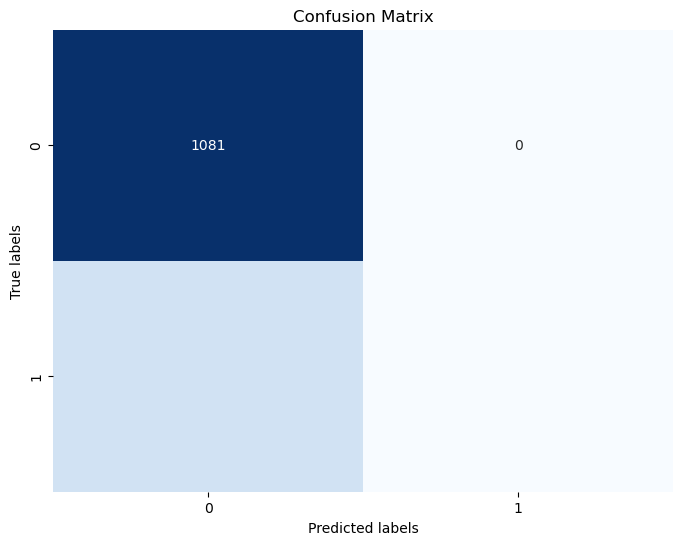

In [25]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
from sklearn.metrics import roc_curve, auc

In [27]:
# Getting the predicted probabilities for the positive class
y_scores = svc.decision_function(X_test)

In [28]:
# Calculating the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

In [29]:
# Calculating the AUC
roc_auc = auc(fpr, tpr)

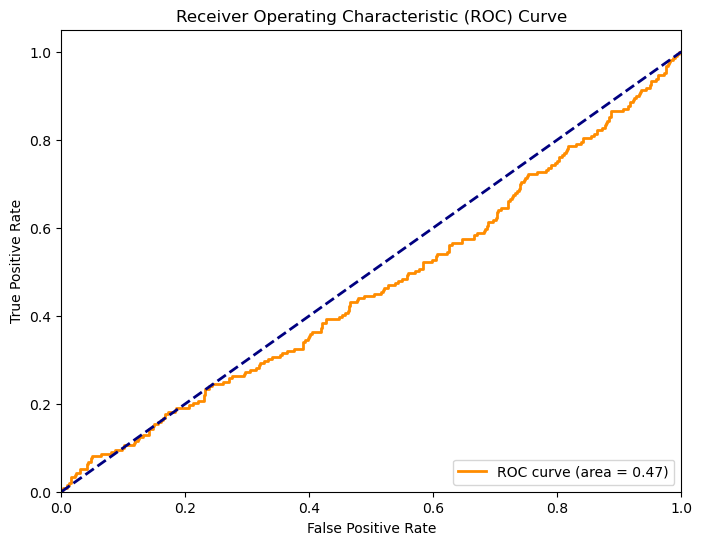

In [30]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [31]:
from sklearn.metrics import precision_score, recall_score

In [33]:
precision = precision_score(y_test, y_pred, zero_division=1)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

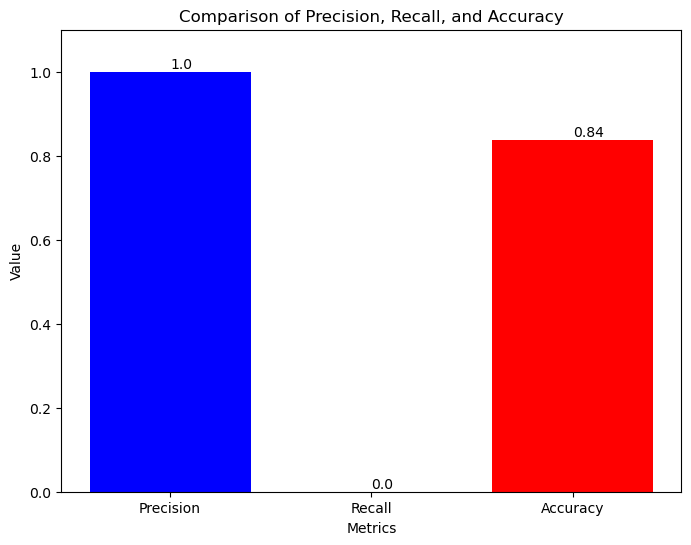

In [35]:
# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(['Precision', 'Recall', 'Accuracy'], [precision, recall, accuracy], color=['blue', 'green', 'red'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Precision, Recall, and Accuracy')
plt.ylim(0, 1.1)
plt.show()